# 0. 준비 과정 및 데이터 불러오기

In [ ]:
# 글씨체 설정 코드입니다.
# 런타임 - 런타임 다시 시작을 클릭하여 런타임을 재시작합니다. 
# 단 다시 실행할때에는 이 셀을 실행하지 않습니다. 밑 셀부터 실행해주세요.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155501 files and di

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ata = pd.read_csv('/content/drive/Shareddrives/🐣DATAMINING_22_1🐣/주제분석/data/클러스터링/클러스터링_데이터.csv', encoding = 'utf-8')

# 1. clustering function

In [4]:
################################ 🐣여기다 채워주면 됩니다용 🐣##################################
################################ 최종 clusterng 최종 함수(전체 적용가능한!) ###########################################
# 필요한 패캐지 불러오기
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import seaborn as sns

from sklearn.neighbors import NearestNeighbors


# 변수들의 개수와 종류는 우리가 임의로 넣어줘야 하지만, 클러스터 개수는 여러가지 method를 통해 구해줄 수 있다.
# best_clustering에 대한 parameter를 잠시 소개하자면 
# full_dataset은 data
# model_type은 clustering 종류: Kmeans, Kmedoids, GMM, DBSCAN, Hierarchical
# scaled는 data scale을 진행할 것인지 말것인지: None, standard, minmax
# max_cluster: 2개부터 최대 몇개까지의 클러스터를 생성해볼 것이고 각각의 실루엣 계수의 평균을 확인할 것인지.
# 이 함수를 통해서는 최종적으로 특정 조건하에 몇개의 클러스터를 생성하는 것이 좋은지를 보여주는 함수입니다.
def best_clusternum(full_dataset,model_type="Kmeans",scaled="None",max_cluster=6):
  # 0. 스케일링 진행할지 말지 여부.
  standardscaler = StandardScaler()
  minmaxscaler = MinMaxScaler()

  if scaled=='standard':
    full_dataset=pd.DataFrame(data=standardscaler.fit_transform(full_dataset),columns=full_dataset.columns)
  elif scaled=="minmax":
    full_dataset=pd.DataFrame(data=minmaxscaler.fit_transform(full_dataset),columns=full_dataset.columns)
  
  print("1. Elbow method")
  #1. elbow method
  if model_type=="Kmeans":
    print("K-means clustering")
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(1,max_cluster))
    visualizer.fit(full_dataset)
    visualizer.show()
  elif model_type=="Kmedoids":
    print("K-medoids clustering")
    model=KMedoids()
    visualizer = KElbowVisualizer(model, k=(1,max_cluster))
    visualizer.fit(full_dataset)
    visualizer.show()
  elif model_type=="GMM":
    print("GMM clustering")
    cluster_num_list=list(range(2,(max_cluster+1)))
    model = [GaussianMixture(n, random_state=4).fit(full_dataset)
          for n in cluster_num_list]
    plt.plot(cluster_num_list, [m.bic(full_dataset) for m in model], label='BIC')
    plt.plot(cluster_num_list, [m.aic(full_dataset) for m in model], label='AIC')
    plt.legend(loc='best')
    plt.xlabel('n_components')
    plt.show()
  elif model_type=="DBSCAN":
    print("DBSCAN clustering")
    pass 
    # 채워넣아야
  elif model_type=="Hierarchical":
    print("Hierarchical clustering")
    model=AgglomerativeClustering()
    visualizer = KElbowVisualizer(model, k=(1,max_cluster))
    visualizer.fit(full_dataset)
    visualizer.show()
    # 채워넣아야

  #2. silhouette method: max_cluster의 숫자에 따라 2 - max_cluster개의 군집들이 각각 생성되고 그에 대한 플롯도 각각 그려질 예정
  print("2. Silhouette method")
  #fig, ax = plt.subplots(figsize=(4*max_cluster, 4), ncols=max_cluster)
  # 시각화하고 싶은 클러스터의 개수
  cluster_num_list=list(range(2,(max_cluster+1)))

  if model_type=="Kmeans":
    for p_index,n_cluster in enumerate(cluster_num_list):  
      kmeans_2 = KMeans(n_clusters=n_cluster, random_state=111,init='random')
      visualizer_2 = SilhouetteVisualizer(kmeans_2, colors='yellowbrick')
      visualizer_2.fit(full_dataset)      
      visualizer_2.show()
  elif model_type=="Kmedoids":
    for p_index,n_cluster in enumerate(cluster_num_list):  
      kmedoids_2 = KMedoids(n_clusters=n_cluster, random_state=111,init='random')
      visualizer_2 = SilhouetteVisualizer(kmedoids_2, colors='yellowbrick')
      visualizer_2.fit(full_dataset)      
      visualizer_2.show()
  elif model_type=="GMM":
    for n_cluster in cluster_num_list :
      fig, ax1 = plt.subplots(1,1)
      fig.set_size_inches(8,4)
      ax1.set_xlim([-0.1,1])
      ax1.set_ylim([0, len(full_dataset) + (n_cluster + 1) * 10])
      gmm_2 = GaussianMixture(n_components = n_cluster,random_state = 4)
      visualizer_2  = gmm_2.fit_predict(full_dataset)
      sil_score = silhouette_score(full_dataset, visualizer_2, metric="euclidean")
      sample_silhouette_values = silhouette_samples(full_dataset, visualizer_2)
      y_lower = 10
      for i in range(n_cluster) :
        ith_cluster_silhouette_values = \
            sample_silhouette_values[visualizer_2 == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
      ax1.set_title("The Silhouette Plot of GMM Clustering for {} Samples in {} Clusters".format(full_dataset.shape[0],n_cluster))
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("cluster label")
      ax1.axvline(x=sil_score, color="red", linestyle="--")
      ax1.set_yticks([])
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

  elif model_type=="DBSCAN":
    neighbors = NearestNeighbors(n_neighbors=6)
    neighbors_fit = neighbors.fit(full_dataset)
    distances, indices = neighbors_fit.kneighbors(full_dataset)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.show()
    # eps 입력받기
    eps_temp=float(input("eps를 입력하세요"))
    # 모델 생성
    model = DBSCAN(eps = eps_temp, min_samples=6, metric='euclidean')
    model.fit_predict(full_dataset)
    # 예측값 생성
    predict = pd.DataFrame(model.fit_predict(full_dataset))
    predict.columns=['predict']
    cluster_num=len(predict['predict'].unique())
    cluster_unique=predict['predict'].unique().tolist()
    palette_1=sns.color_palette("pastel",cluster_num)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 5)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(full_dataset) + (cluster_num) * 10])
    y_lower = 10
    silhouette_avg = silhouette_score(full_dataset, model.fit_predict(full_dataset))
    sample_silhouette_values = silhouette_samples(full_dataset, model.fit_predict(full_dataset))

    score_samples = silhouette_samples(full_dataset, predict['predict']) #모든 개별 데이터에 실루엣 계수값을 구함. 
    predict['silhouette_coeff'] = score_samples

    for i in cluster_unique:
      ith_cluster_silhouette_values = \
          sample_silhouette_values[model.fit_predict(full_dataset) == i]
      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i+1) / cluster_num)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10  # 10 for the 0 samples
      ax1.set_title('Silhouette Plot of DBSCAN Clustering for {} Samples in {} Clusters'.format(full_dataset.shape[0],cluster_num))
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      avg = predict.groupby('predict')['silhouette_coeff'].mean()  #그룹별 실루엣 계수 mean

      ax1.axvline(x=avg.mean(), color="red", linestyle="--")
      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

  elif model_type=="Hierarchical":
    #reference:https://www.kaggle.com/code/kevzzsk/hierarchical-clustering/notebook
    for n_clusters in cluster_num_list:
      fig, ax1 = plt.subplots(1, 1)
      fig.set_size_inches(8, 5)
      ax1.set_xlim([-0.1, 1])
      ax1.set_ylim([0, len(full_dataset) + (n_clusters) * 10])
      hiera_2 = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
      visualizer_2 = hiera_2.fit_predict(full_dataset)
      silhouette_avg = silhouette_score(full_dataset, visualizer_2)
      sample_silhouette_values = silhouette_samples(full_dataset, visualizer_2)
      y_lower = 10
      
      for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[visualizer_2 == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i+1) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.set_title('Silhouette Plot of Hierarchical Clustering for {} Samples in {} Clusters'.format(full_dataset.shape[0],n_clusters))
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      plt.show()

## dataset, column_num, cluster_num, scaled: standard, minmax, None
# dataset은 데이터셋
# cluster_num은 위에서 best_clusternum함수에서 나온 최적의 클러스터 개수를 적자. 그러면 이 개수만큼 클러스터가 생성될 것이다.
# 나머지는 위와 동일
# 이 함수는 best_clusternum에서 나온 최적의 클러스터 개수와 조건을 집어넣고 실제 클러스터링의 결과를 확인하는 함수입니다.
def final_clustering(dataset, cluster_num,scaled="None",model_type="Kmeans"):
  #실행 전 시각화에 사용할 palette 정의
  palette_1=sns.color_palette("pastel",cluster_num)
  # 1. 스케일링 진행
  standardscaler = StandardScaler()
  minmaxscaler = MinMaxScaler()

  if scaled=='standard':
    dataset=pd.DataFrame(data=standardscaler.fit_transform(dataset),columns=dataset.columns)
  elif scaled=="minmax":
    dataset=pd.DataFrame(data=minmaxscaler.fit_transform(dataset),columns=dataset.columns)
  
  # 2. 클러스터링 진행
  if model_type=="Kmeans":
    print("Kmeans clustering")
    model = KMeans(n_clusters = cluster_num, random_state = 4)
    model.fit(dataset) #K-Means 클러스터링을 수행
    predict = pd.DataFrame(model.predict(dataset)) #unlabeled 데이터를 그룹에 할당
    predict.columns=['predict']
  elif model_type=="Kmedoids":
    print("kmedioids clustering")
    model = KMedoids(n_clusters = cluster_num, random_state = 4)
    model.fit(dataset) #K-Means 클러스터링을 수행
    predict = pd.DataFrame(model.predict(dataset)) #unlabeled 데이터를 그룹에 할당
    predict.columns=['predict']
  elif model_type=="GMM":
    print("GMM clustering")
    model = GaussianMixture(n_components = cluster_num, random_state=4)
    model.fit(dataset)
    predict = pd.DataFrame(model.predict(dataset)) #unlabeled 데이터를 그룹에 할당
    predict.columns=['predict']
  elif model_type=="DBSCAN":
    print("DBSCAN clustering")
    # eps 입력받기
    eps_temp=float(input("eps를 입력하세요"))
    # 모델 생성
    model = DBSCAN(eps = eps_temp, min_samples=6, metric='euclidean')
    model.fit_predict(dataset)
    predict = pd.DataFrame(model.fit_predict(dataset)) #unlabeled 데이터를 그룹에 할당
    predict.columns=['predict']
    cluster_num=len(predict['predict'].unique())
    cluster_unique=predict['predict'].unique().tolist()
    palette_1=sns.color_palette("pastel",cluster_num)
  elif model_type=="Hierarchical":
    print("Hierarchical clustering")
    model=AgglomerativeClustering(n_clusters=cluster_num, affinity="euclidean",linkage='ward')
    model.fit_predict(dataset)
    predict = pd.DataFrame(model.fit_predict(dataset)) #unlabeled 데이터를 그룹에 할당
    predict.columns=['predict']

  df_predict = pd.concat([dataset,predict],axis=1)
  df_predict['predict'].value_counts() #클러스터별 데이터 개수

  # 3. cluster 시각화 진행. 차원이 2개 이상인 경우 T-SNE로 시각화 진행하기
  if dataset.shape[1]== 2 :
    print("시각화 결과\n")
    plt.scatter(df_predict.iloc[:,0],df_predict.iloc[:,1],c = df_predict['predict'], cmap='viridis')
    plt.colorbar()
     #시각화
    plt.show()   
    # plt.rc('font', family='NanumBarunGothic') 
    # p=sns.scatterplot(df_predict.iloc[:,0],df_predict.iloc[:,1],hue=df_predict['predict'],alpha=0.7,palette=palette_1)
    # p.set_title("한글되니?")
    # plt.show()   
    # print("여기")
    # 현재 폰트가 잘 안먹히는 현상 발생하여 일단 주석처리, 
  else:
    tsne_np = TSNE(n_components = 2, random_state=4).fit_transform(df_predict.drop(['predict'], axis = 1)) #t-sne
    tsne_np = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])
    tsne_np = pd.concat([tsne_np, df_predict['predict']], axis = 1)

    print("시각화 결과\n")
    sns.scatterplot(tsne_np['component 0'],tsne_np['component 1'],hue=tsne_np['predict'],alpha=0.7,palette=palette_1)
    plt.show()
        
  score_samples = silhouette_samples(dataset, df_predict['predict']) #모든 개별 데이터에 실루엣 계수값을 구함. 
  df_predict['silhouette_coeff'] = score_samples
        
  avg = df_predict.groupby('predict')['silhouette_coeff'].mean()  #그룹별 실루엣 계수 mean

  print("\n\n클러스터별 데이터 개수")
  display(df_predict['predict'].value_counts())
  print("\n\n전체 클러스터 mean값")
  display(avg.mean())

  print("\n\n")
  display(df_predict.groupby('predict').agg(["count","mean", "std"]))

  if model_type=="Hierarchical": #계층적 클러스터링은 elbowpoint는 그려주는데 silhouete 계수는 직접 그리는 방식으로 진행해줘야함
    print('덴드로그램\n')
    dend=shc.dendrogram(shc.linkage(dataset,method='ward'))
    print('실루엣 계수\n')
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 5)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(dataset) + (cluster_num) * 10])
    y_lower = 10
    silhouette_avg = silhouette_score(dataset, model.fit_predict(dataset))
    sample_silhouette_values = silhouette_samples(dataset, model.fit_predict(dataset))
    #model=hiera_2, visualizer_2=model.fit_predict(dataset)

    for i in range(cluster_num):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[model.fit_predict(dataset) == i]
      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i+1) / cluster_num)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10  # 10 for the 0 samples
      ax1.set_title('Silhouette Plot of Hierarchical Clustering for {} Samples in {} Clusters'.format(dataset.shape[0],cluster_num))
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

  elif model_type=="GMM":
      fig, ax1 = plt.subplots(1,1)
      fig.set_size_inches(8,4)
      ax1.set_xlim([-0.1,1])
      ax1.set_ylim([0, len(dataset) + (cluster_num + 1) * 10])
      gmm_2 = GaussianMixture(n_components = cluster_num,random_state = 4)
      visualizer_2  = gmm_2.fit_predict(dataset)
      sil_score = silhouette_score(dataset, visualizer_2, metric="euclidean")
      sample_silhouette_values = silhouette_samples(dataset, visualizer_2)
      y_lower = 10
      for i in range(cluster_num) :
        ith_cluster_silhouette_values = \
            sample_silhouette_values[visualizer_2 == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / cluster_num)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
      ax1.set_title("The Silhouette Plot of GMM Clustering for {} Samples in {} Clusters".format(dataset.shape[0],cluster_num))
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("cluster label")
      ax1.axvline(x=sil_score, color="red", linestyle="--")
      ax1.set_yticks([])
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.show()
  elif model_type=="DBSCAN":
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 5)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(dataset) + (cluster_num) * 10])
    y_lower = 10
    silhouette_avg = silhouette_score(dataset, model.fit_predict(dataset))
    sample_silhouette_values = silhouette_samples(dataset, model.fit_predict(dataset))
    #model=hiera_2, visualizer_2=model.fit_predict(dataset)

    for i in cluster_unique:
      ith_cluster_silhouette_values = \
          sample_silhouette_values[model.fit_predict(dataset) == i]
      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i+1) / cluster_num)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10  # 10 for the 0 samples
      ax1.set_title('Silhouette Plot of DBSCAN Clustering for {} Samples in {} Clusters'.format(dataset.shape[0],cluster_num))
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")
      ax1.axvline(x=avg.mean(), color="red", linestyle="--")
      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()
    
  else:
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    #생성된 visualizer에 데이터 입력 
    visualizer.fit(dataset)      
    print("\n\n")
    visualizer.show()

In [ ]:
############################ 실행코드 #######################################
# data 변수 종류는 미리 걸러준 채로 집어넣어주세요!

In [ ]:
ata["쓰레기 배출량 비율(10m)"]=ata["쓰레기 배출량 비율"]/10000

In [ ]:
# 변수 2개 조합 적절히!
ata2_1 = ata[['거주인구비율', '쓰레기 배출량 비율(10m)']]
ata2_2 = ata[['거주인구비율', '무인가능공간개수 비율']]
ata2_3 = ata[['쓰레기 배출량 비율(10m)', '무인가능공간개수 비율']]
# 변수 3개 데이터 셋
ata3 = ata[['거주인구비율','쓰레기 배출량 비율(10m)', '무인가능공간개수 비율']]

## GMM 실행 예시
### (1) ata2_3

In [ ]:
best_clusternum(ata2_3, model_type="GMM",scaled="minmax",max_cluster=6)

In [ ]:
final_clustering(ata2_3,2,scaled="minmax",model_type="GMM")

In [ ]:
best_clusternum(ata2_3, model_type="GMM",scaled="standard",max_cluster=6)

In [ ]:
final_clustering(ata2_3,2,scaled="standard",model_type="GMM")

In [ ]:
best_clusternum(ata2_3, model_type="GMM",scaled="none",max_cluster=6)

In [ ]:
final_clustering(ata2_3,3,scaled="none",model_type="GMM")

## (2) ata2_1

In [ ]:
best_clusternum(ata2_1, model_type="GMM",scaled="minmax",max_cluster=6)

In [ ]:
final_clustering(ata2_1,4,scaled="minmax",model_type="GMM")

In [ ]:
best_clusternum(ata2_1, model_type="GMM",scaled="standard",max_cluster=6)

In [ ]:
final_clustering(ata2_1,4,scaled="standard",model_type="GMM")

1. Elbow method
GMM clustering


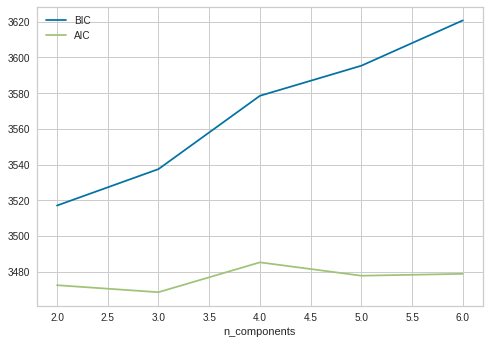

2. Silhouette method


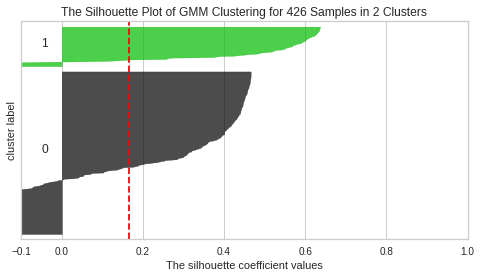

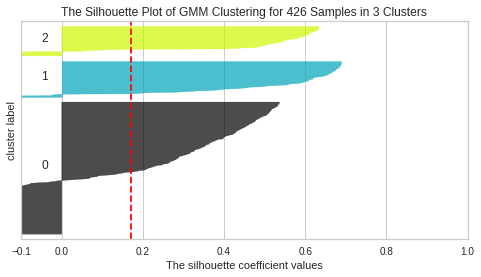

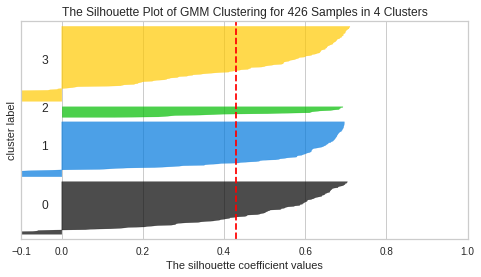

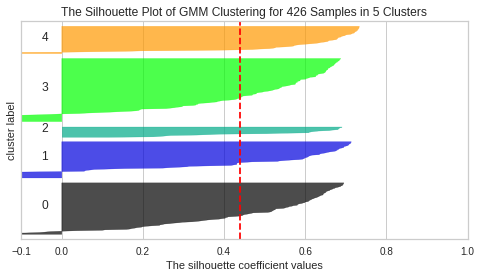

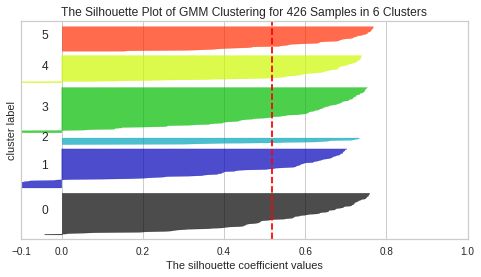

In [ ]:
best_clusternum(ata2_1, model_type="GMM",scaled="none",max_cluster=6)

GMM clustering
시각화 결과



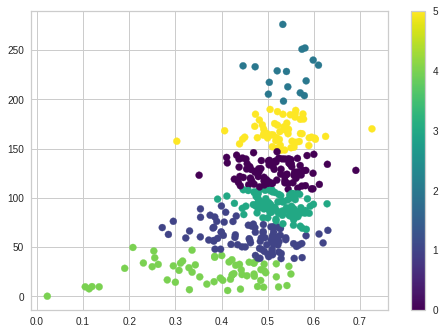



클러스터별 데이터 개수


3    104
0     96
1     90
4     63
5     57
2     16
Name: predict, dtype: int64



전체 클러스터 mean값


0.5334951552639412

거주인구비율                     쓰레기 배출량 비율(10m)                         \
         count      mean       std           count        mean        std   
predict                                                                     
0           96  0.516074  0.055743              96  126.139326  10.124568   
1           90  0.467082  0.075525              90   59.868415  12.198649   
2           16  0.543326  0.046112              16  227.455513  20.886636   
3          104  0.521034  0.042994             104   91.606430   9.653404   
4           63  0.376857  0.121199              63   24.615279  11.503067   
5           57  0.529119  0.059444              57  166.667861  11.364653   

        silhouette_coeff                      
                   count      mean       std  
predict                                       
0                     96  0.554081  0.204894  
1                     90  0.352909  0.394029  
2                     16  0.566410  0.206730  
3                    104  0.520845  0.272544  
4                     63  0.574256  0.262643  
5                     57  0.632471  0.158301

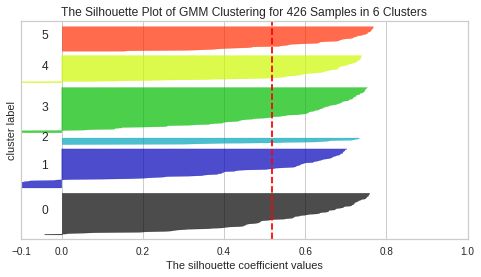

In [ ]:
final_clustering(ata2_1,6,scaled="none",model_type="GMM")

### (3) ata2_2

In [ ]:
best_clusternum(ata2_2, model_type="GMM",scaled="minmax",max_cluster=6)

In [ ]:
final_clustering(ata2_2,2,scaled="minmax",model_type="GMM")

In [ ]:
best_clusternum(ata2_2, model_type="GMM",scaled="standard",max_cluster=6)

In [ ]:
final_clustering(ata2_2,2,scaled="standard",model_type="GMM")

1. Elbow method
GMM clustering


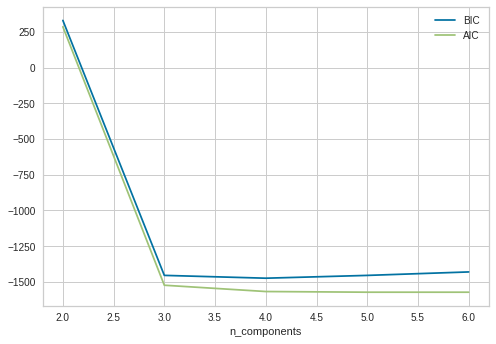

2. Silhouette method


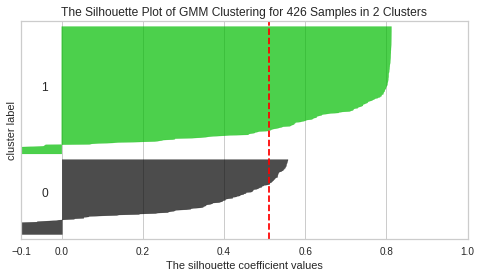

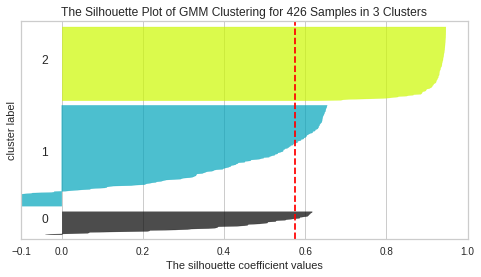

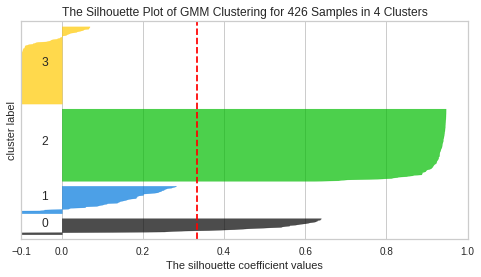

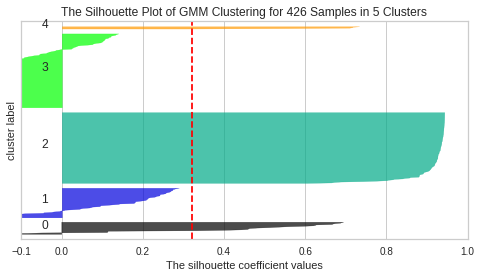

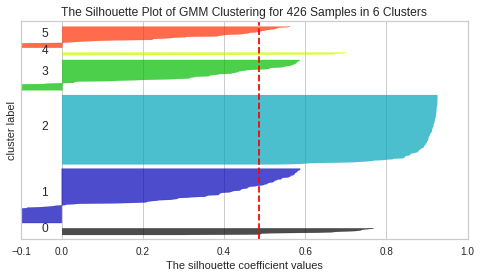

In [ ]:
best_clusternum(ata2_2, model_type="GMM",scaled="none",max_cluster=6)

GMM clustering
시각화 결과



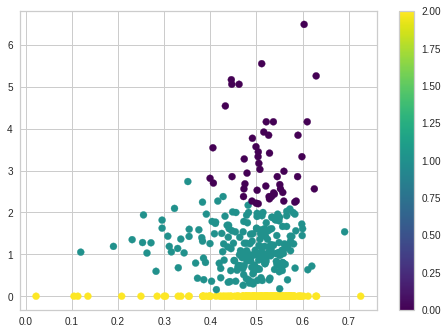



클러스터별 데이터 개수


1    217
2    159
0     50
Name: predict, dtype: int64



전체 클러스터 mean값


0.5673547682060762

거주인구비율                     무인가능공간개수 비율                      \
         count      mean       std       count      mean       std   
predict                                                              
0           50  0.517761  0.055809          50  3.275130  1.021876   
1          217  0.479203  0.083603         217  1.177259  0.512286   
2          159  0.493635  0.099282         159  0.000000  0.000000   

        silhouette_coeff                      
                   count      mean       std  
predict                                       
0                     50  0.427294  0.194490  
1                    217  0.356228  0.367485  
2                    159  0.918542  0.049627

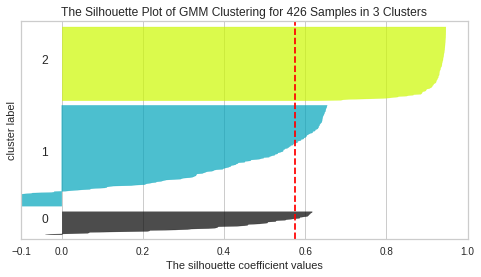

In [ ]:
final_clustering(ata2_2,3,scaled="none",model_type="GMM")

### (4) ALL

In [ ]:
best_clusternum(ata3, model_type="GMM",scaled="minmax",max_cluster=6)

In [ ]:
final_clustering(ata3,2,scaled="minmax",model_type="GMM")

In [ ]:
best_clusternum(ata3, model_type="GMM",scaled="standard",max_cluster=6)

In [ ]:
final_clustering(ata3,2,scaled="standard",model_type="GMM")

In [ ]:
best_clusternum(ata3, model_type="GMM",scaled="none",max_cluster=6)

In [ ]:
final_clustering(ata3,3,scaled="none",model_type="GMM")

#이 밑은 실행하지 말아주세요##

In [ ]:
#best_clusternum(ata,model_type="Kmeans",scaled="None",max_cluster=6)
#dataset, column_num, cluster_num,scaled="None",model_type="Kmeans"
#final_kmeans_clustering(ata,3,2,scaled="None",model_type="Kmeans")

In [ ]:
##다 적었는데 더간단한 방법이 있더라고,,?그래도 아까우니 지우진않을게,,ㅎㅎ
# 실루엣 계수 직접 그려주는 함수. 아까우니까 남기기1
      # 2. 직접 plot 그려주기
      # model = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
      # predict_labels=model.fit_predict(full_dataset)

      # sil_avg=silhouette_score(full_dataset,predict_labels)
      # print("sil_avg: "+str(sil_avg))
      # sil_values=silhouette_samples(full_dataset,predict_labels)
      # print("sil_values: "+str(sil_values))

      # y_lower=10
      # axs[p_index].set_title("Number of Cluseter :" + str(n_cluster)+"\n"+'Silhouette Score :'+str(round(sil_avg,3)))
      # axs[p_index].set_xlabel("The silhouette coefficient values")
      # axs[p_index].set_ylabel("Cluster label")
      # # x값 범위
      # axs[p_index].set_xlim([-0.1,1])
      # # y값 범위
      # axs[p_index].set_ylim([0,len(full_dataset)+(n_cluster+1)*10])
      # # y값 범례 없애기
      # axs[p_index].set_yticks([]) 
      # axs[p_index].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

      # # 클러스터 갯수별로 fill_betweenx( )형태의 막대 그래프 표현!! 그래프 하나!
      # for i in range(n_cluster):
      #   ith_cluster_sil_values = sil_values[predict_labels==i]
      #   ith_cluster_sil_values.sort()
           
      #   size_cluster_i = ith_cluster_sil_values.shape[0]
      #   y_upper = y_lower + size_cluster_i
      #   color = cm.nipy_spectral(float(i) / n_cluster)
      #   axs[p_index].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
      #                           facecolor=color, edgecolor=color, alpha=0.7)
      #   axs[p_index].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      #   y_lower = y_upper + 10
      #   axs[p_index].axvline(x=sil_avg, color="red", linestyle="--")



## K-medoids


In [ ]:
#pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
import numpy as np

ModuleNotFoundError: ignored

In [ ]:
kmedoids_model = KMedoids(n_clusters=4, random_state=4)
kmedoids_model.fit(feature) #K-Medoid 클러스터링을 수행
predict = pd.DataFrame(kmedoids_model.predict(feature)) #unlabeled 데이터를 그룹에 할당
predict.columns=['predict']
r = pd.concat([feature,predict],axis=1)
plt.scatter(r['주택 수'],r['쓰레기배출량2020'],c=r['predict'],alpha=0.5)

## GMM


In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.mixture import GaussianMixture

In [ ]:
gmm = GaussianMixture(n_components=4, random_state=4) 
gmm_labels = gmm.fit_predict(data)

## K-means
1. n_clusters: 


In [ ]:
# from sklearn.metrics import silhouette_samples, silhouette_score
# from yellowbrick.cluster import KElbowVisualizer
# model =KMeans(n_clusters=2,random_state=4)
# visualizer = KElbowVisualizer(model, k = (4, 6), metric = 'silhouette', timings = True)
# visualizer.fit(clust_data)

In [ ]:
#kmeans_model = KMeans(n_clusters=2,random_state=4)
#kmeans_model.fit(feature) #K-Mean 클러스터링을 수행
#predict = pd.DataFrame(kmeans_model.predict(feature)) #unlabeled 데이터를 그룹에 할당
#predict.columns=['predict']

In [ ]:
#r = pd.concat([feature,predict],axis=1)
#r

In [ ]:
#plt.scatter(r['주택 수'],r['주점 수'],c=r['predict'],alpha=0.5)

### t-SNE

In [ ]:
#tsne_np = TSNE(n_components = 2).fit_transform(r.drop(['predict'], axis = 1))
#tsne_np = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])
#df = pd.concat([tsne_np, r['predict']], axis = 1)

#plt.scatter(df['component 0'],df['component 1'],c=df['predict'],alpha=0.5)

### 실루엣 계수 계산 코드


In [ ]:
#score_samples = silhouette_samples(feature, r['predict']) #모든 개별 데이터에 실루엣 계수값을 구함. 
#r['silhouette_coeff'] = score_samples
#r.iloc[:,0]

In [ ]:
#avg = r.groupby('predict')['silhouette_coeff'].mean() #그룹별 실루엣 계수

In [ ]:
#avg.mean() #clustering 실루엣 계수 평균

In [ ]:
#r.groupby("predict")['주택 수'].agg(['sum','mean'])

In [ ]:
# #클러스터 진햄할 변수만 추출한 데미터 프레밈 만들기 == dataset

# def kmeans_clustering(dataset, column_num, cluster_num):

    
#     for i in range(0, column_num):
#         #feature = pd.DataFrame(ata[i])
#         col = dataset.columns[i]

#         kmeans_model = KMeans(n_clusters = cluster_num, random_state = 4)
#         kmeans_model.fit(dataset) #K-Means 클러스터링을 수행
#         predict = pd.DataFrame(kmeans_model.predict(dataset)) #unlabeled 데이터를 그룹에 할당
#         predict.columns=['predict']

#         df = pd.concat([dataset,predict],axis=1)
#         df['predict'].value_counts() #클러스터별 데이터 개수

#         if cluster_num == 2 :
            
#             print("시각화 결과\n")
#             plt.scatter(df.iloc[:,0],df.iloc[:,1],c = df['predict'], alpha=0.5) #시각화
            

#         else:
#             tsne_np = TSNE(n_components = 2, random_state=4).fit_transform(df.drop(['predict'], axis = 1)) #t-sne
#             tsne_np = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])
#             tsne_np = pd.concat([tsne_np, df['predict']], axis = 1)

#             print("시각화 결과\n")
#             plt.scatter(tsne_np['component 0'],tsne_np['component 1'],c=tsne_np['predict'],alpha=0.5)
        
#         score_samples = silhouette_samples(dataset, df['predict']) #모든 개별 데이터에 실루엣 계수값을 구함. 
#         df['silhouette_coeff'] = score_samples
        
#         avg = df.groupby('predict')['silhouette_coeff'].mean()  #그룹별 실루엣 계수 mean

#         print(col, "변수의 클러스터별 합계 & 평균\n", df.groupby('predict')[col].agg(['sum', 'mean'])) # 클러스터별 column(변수들 평균)

#     print("클러스터별 데이터 개수\n\n",
#           df['predict'].value_counts())
#     print("전체 클러스터 mean값\n\n", avg.mean())

# kmeans_clustering(ata,3,3)